<a href="https://colab.research.google.com/github/medaminechafii/backpack-prediction-competition/blob/main/backpack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')
mpl.rcParams["axes.labelcolor"] = "white"
mpl.rcParams["axes.edgecolor"] = "white"
mpl.rcParams["xtick.color"] = "white"
mpl.rcParams["ytick.color"] = "white"
sns.set_theme(style="darkgrid")
plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.2)
sns.set_palette("coolwarm")


In [116]:
train_set = pd.read_csv('train.csv',index_col='id')

test_set = pd.read_csv('test.csv',index_col = "id")

In [117]:
all_set = pd.concat([train_set, test_set])

In [118]:
train_set.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [119]:
train_set.describe()

,Compartments,Weight Capacity (kg),Price
count,300000.000000,299862.000000,300000.000000
mean,5.443590,18.029994,81.411107
std,2.890766,6.966914,39.039340
min,1.000000,5.000000,15.000000
25%,3.000000,12.097867,47.384620
50%,5.000000,18.068614,80.956120
75%,8.000000,24.002375,115.018160
max,10.000000,30.000000,150.000000


In [120]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 25.2+ MB


In [121]:
#change compartement to a categorical data
train_set["Compartments"] = train_set["Compartments"].astype("object")

In [122]:
cat_variables = train_set.select_dtypes(include='object').columns
num_variables = train_set.select_dtypes(exclude='object').columns

In [123]:
[train_set[col].value_counts() for col in cat_variables]

[Brand
 Adidas          60077
 Under Armour    59992
 Nike            57336
 Puma            56814
 Jansport        56076
 Name: count, dtype: int64,
 Material
 Polyester    79630
 Leather      73416
 Nylon        70603
 Canvas       68004
 Name: count, dtype: int64,
 Size
 Medium    101906
 Large      98643
 Small      92856
 Name: count, dtype: int64,
 Compartments
 1.0     31568
 4.0     31498
 2.0     30595
 3.0     30293
 7.0     30158
 9.0     29965
 5.0     29959
 10.0    29815
 8.0     28909
 6.0     27240
 Name: count, dtype: int64,
 Laptop Compartment
 Yes    148342
 No     144214
 Name: count, dtype: int64,
 Waterproof
 Yes    148077
 No     144873
 Name: count, dtype: int64,
 Style
 Messenger    100031
 Tote          97438
 Backpack      94561
 Name: count, dtype: int64,
 Color
 Pink     51690
 Gray     50280
 Blue     48097
 Red      47219
 Green    46386
 Black    46378
 Name: count, dtype: int64]

In [124]:
num_variables

Index(['Weight Capacity (kg)', 'Price'], dtype='object')

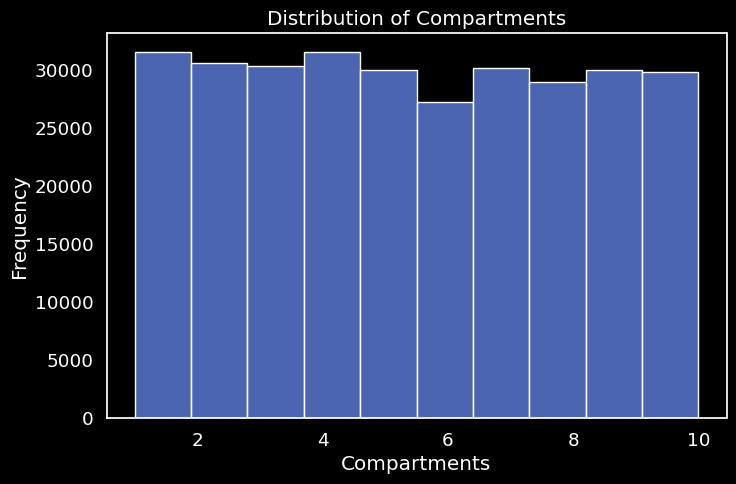

In [125]:
feature = "Compartments"
plt.figure(figsize=(8, 5))
sns.histplot(train_set[feature], bins=10)
plt.title(f"Distribution of {feature}")
plt.grid(False)
plt.xlabel(feature)
plt.ylabel("Frequency")
plt.show()

In [126]:
for col in cat_variables:
  print(train_set.groupby(col)["Price"].mean().sort_values(ascending=False))

Brand
Under Armour    81.976311
Jansport        81.791276
Puma            81.448607
Nike            81.319209
Adidas          80.631060
Name: Price, dtype: float64
Material
Canvas       82.106511
Polyester    82.033315
Nylon        81.024760
Leather      80.437883
Name: Price, dtype: float64
Size
Large     81.651446
Small     81.424674
Medium    81.343418
Name: Price, dtype: float64
Compartments
4.0     81.969078
8.0     81.906747
10.0    81.685283
5.0     81.477310
6.0     81.452368
7.0     81.440569
3.0     81.332909
1.0     81.263845
2.0     81.171776
9.0     80.418818
Name: Price, dtype: float64
Laptop Compartment
No     81.464702
Yes    81.463842
Name: Price, dtype: float64
Waterproof
No     81.572050
Yes    81.403489
Name: Price, dtype: float64
Style
Messenger    81.410925
Backpack     81.402513
Tote         81.374865
Name: Price, dtype: float64
Color
Green    82.381308
Blue     82.006994
Pink     81.630864
Red      81.011644
Gray     80.851971
Black    80.513439
Name: Price, dty

In [133]:
compartment_size_counts = pd.crosstab(train_set['Compartments'], train_set['Size'])
print(compartment_size_counts)

Size          Large  Medium  Small
Compartments                      
1.0           10186   10707   9924
2.0            9969   10337   9570
3.0            9820   10560   9231
4.0           10342   10743   9699
5.0            9818   10294   9344
6.0            8986    9301   8411
7.0            9958   10227   9313
8.0            9637    9766   8909
9.0            9939   10140   9184
10.0           9988    9831   9271


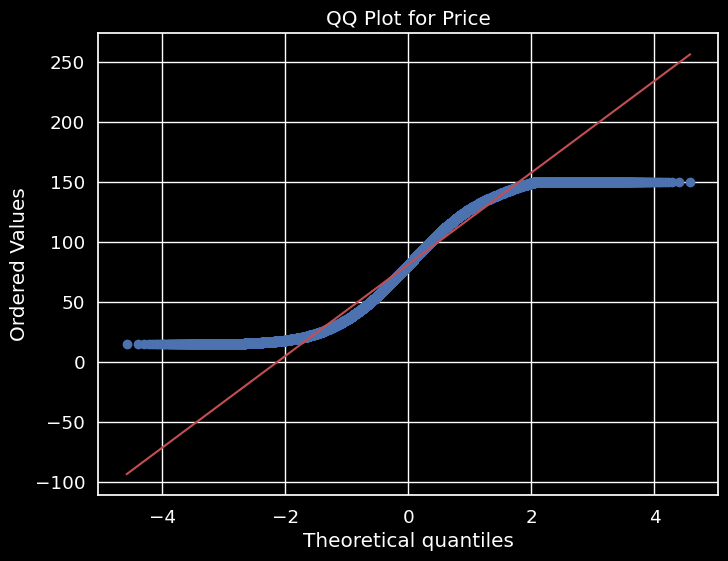

In [134]:
import statsmodels.api as sm
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(train_set['Price'], dist="norm", plot=plt)
plt.title("QQ Plot for Price")
plt.show()
